In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

# Load the model

In [5]:
model = tf.keras.models.load_model('./Models/object_detection.keras')
print('model loaded sucessfully')


model loaded sucessfully


C:\Users\satya\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
# load the new image to test
path='./Kaggle data set/google_images/07bd977e-d578-49a2-b345-7cee5a4db6bf___new_1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpeg'
image= load_img(path)#PIL object
image=np.array(image,dtype=np.uint8)
image1= load_img(path,target_size=(224,224))
image_arr_224= img_to_array(image1)/255.0 #convert into array and get the normalization

In [7]:
#size of the image orginal
h,w,d= image.shape
print('Height of the image in pixels =',h)
print('Width of the image in pixels =',w)

Height of the image in pixels = 358
Width of the image in pixels = 500


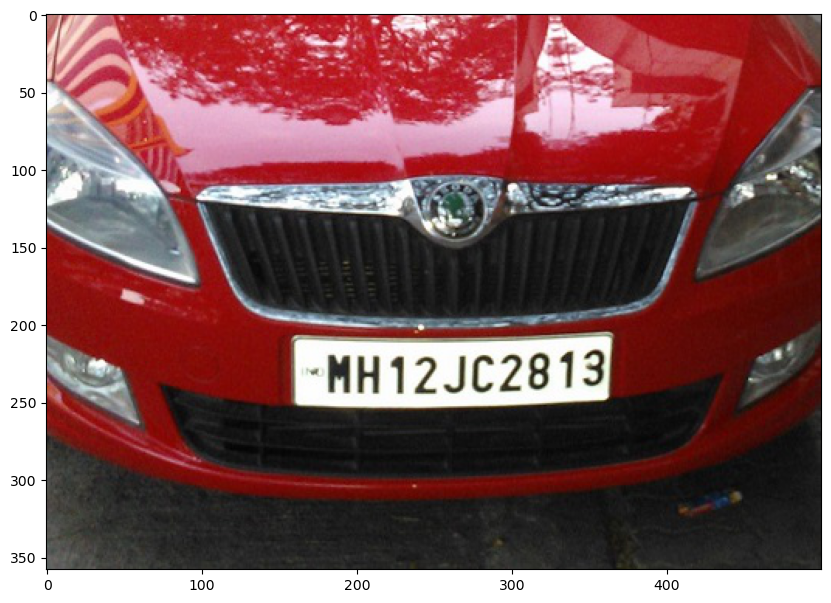

In [8]:
#to increase the size you can resize it
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [9]:
image_arr_224.shape

(224, 224, 3)

In [10]:
test_arr= image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

# MAKE PREDICTIONS

In [11]:
coords=model.predict(test_arr)
coords #the output is normalized output so needed to be denormalized

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([[0.28828952, 0.74686146, 0.5605439 , 0.70146334]], dtype=float32)

## DeNormalisation of the output

In [12]:
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords



array([[144.14475858, 373.43072891, 200.67471433, 251.12387633]])

In [13]:
# Now convert in integer
coords= coords.astype(np.int32)
coords

array([[144, 373, 200, 251]])

# Drawing bounding box

(144, 200) (373, 251)


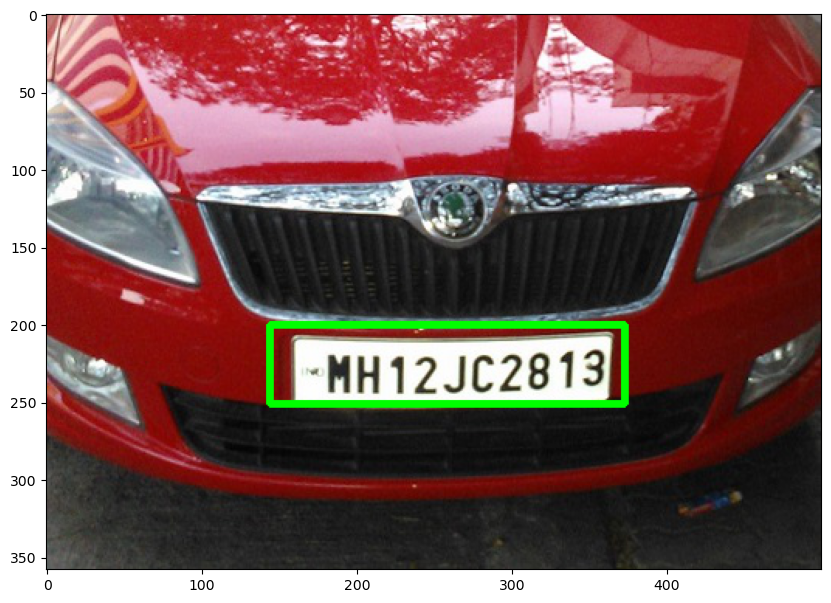

In [14]:
xmin,xmax,ymin,ymax= coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

cv2.rectangle(image,pt1,pt2,(0,255,0),3)

#to increase the size you can resize it
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


# Create Pipeline

In [15]:
# load the new image to test
path='./Kaggle data set/google_images/07bd977e-d578-49a2-b345-7cee5a4db6bf___new_1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpeg'
def object_detection(path):
    image= load_img(path)#PIL object
    image=np.array(image,dtype=np.uint8)#8 bit array(0,255)
    image1= load_img(path,target_size=(224,224))
    #data preprocessing
    image_arr_224= img_to_array(image1)/255.0 #convert into array and get the normalization
    #size of the image orginal
    h,w,d= image.shape

    #Reshape
    test_arr= image_arr_224.reshape(1,224,224,3)
    #test_arr.shape

    coords=model.predict(test_arr)
    #coords 
    
    #DENORMALIZATION
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    #coords
    # Now convert in integer
    coords= coords.astype(np.int32)
    #coords

    #Drawing the rectangle box
    xmin,xmax,ymin,ymax= coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)

    cv2.rectangle(image,pt1,pt2,(0,255,0),3)

    #to increase the size you can resize it
    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.show()
    
    return image, coords


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
(622, 519) (930, 563)


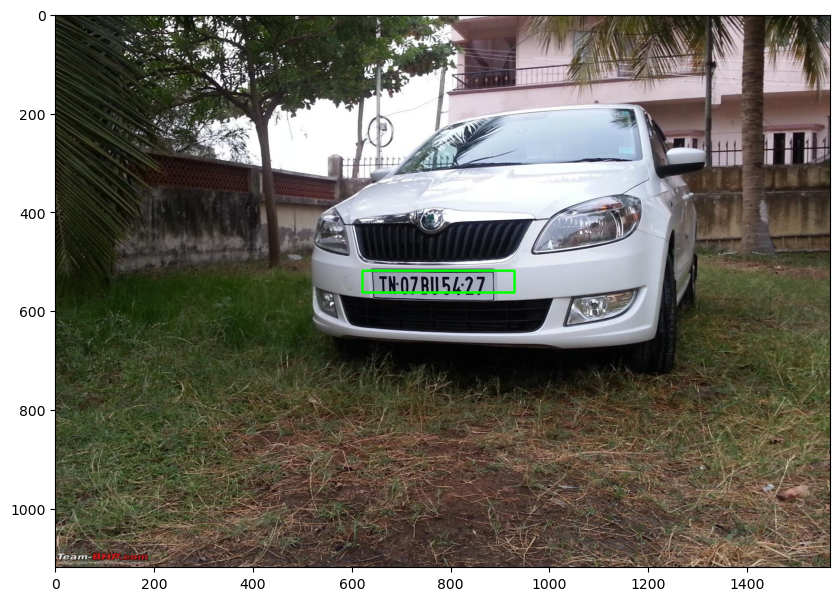

<Figure size 1000x800 with 0 Axes>

In [34]:
#path = './Kaggle data set/google_images/af270103-6ed4-4260-9d01-b8be2e2b9af1___skoda-rapid-1.5-tdi-dsg-review.jpg.jpeg'
path = './Kaggle data set/google_images/ab573806-1da7-4ccf-93c8-6082e0cc15c3___1107433d1373284570-my-modded-skoda-rapid-now-166-bhp-351-nm-119-whp-per-tonne-hdr_00005_normal.jpg.jpeg'
image,cods= object_detection(path)

plt.figure(figsize=(10,8))
plt.show()


# OPTICAL CHARACTER RECOGNITION

### -OCR

In [35]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
(97, 224) (404, 285)


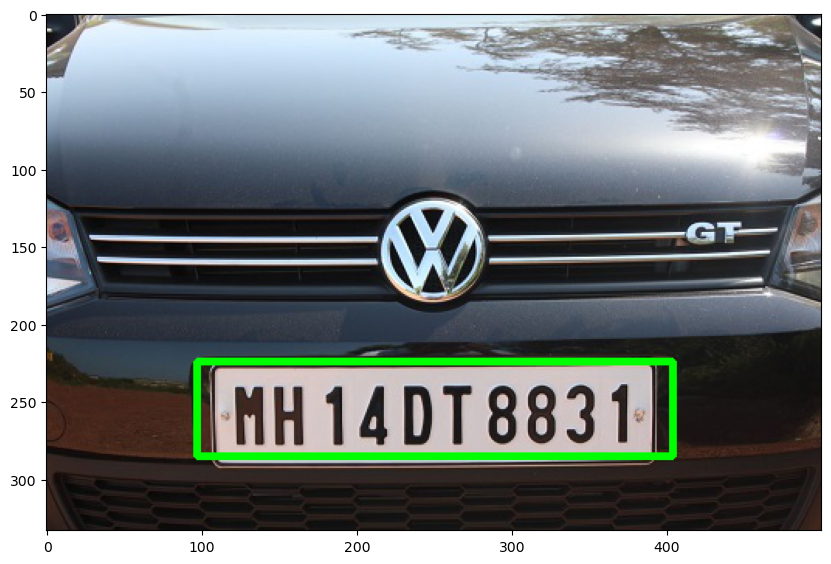

<Figure size 1000x800 with 0 Axes>

In [88]:
#path = './Kaggle data set/google_images/bbf22d00-3dd6-4338-b701-264e0c0c0aff___Maruti-Swift-DZire-Photos-1.jpg.jpeg'
#path = './Kaggle data set/google_images/acd85f93-544d-494e-b2f3-2d445937bb0b___new_1431956d1446017445-number-plates-merchandise-canvas-ink-gurgaon-edit-closed-thumb_img_4418_1024.jpg.jpeg'
path = './Kaggle data set/google_images/ca18d733-ec53-49d9-87aa-a9f6c52cc7bb___VW-Polo-GT-TSI-badge-on-the-grille.jpg.jpeg'
#path = './Kaggle data set/google_images/aa221c22-6600-4f05-9eb9-3676ef0b22e0___69590d1226627898-high-security-number-plates-india-d1.jpg.jpeg'
image,cods= object_detection(path)

plt.figure(figsize=(10,8))
plt.show()


In [89]:
#Apply the coordinates
cods[0]

array([ 97, 404, 224, 285])

In [90]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax=cods[0]
roi= img[ymin:ymax,xmin:xmax]

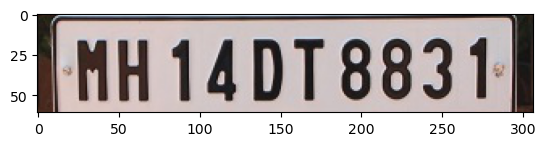

In [91]:
plt.imshow(roi)
plt.show()

# EXTRACT THE TEXT FROM THE IMAGE

In [86]:
# Specify the path to tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\satya\AppData\Local\Tesseract-OCR\tesseract.exe'  # Adjust this path accordingly

In [92]:
text= pt.image_to_string(roi)
text_pr = text.upper()
print(text_pr)


MHH14DT8831»L




# LIMITATIONS AND CHALLENGES OF THE PYTESSERACT